In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import layers
from keras.callbacks import History
import matplotlib.pyplot as plt
import os
from tensorflow.keras.optimizers import Adam
from plain_neural_network import*
from sklearn.metrics import classification_report

2023-07-01 14:34:57.237257: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
img_size = (1200, 480)

In [3]:

num_classes = 3
input_dir_X = "/albedo/home/ssunar/ssh_filtered/months"
weight_path = "/albedo/home/ssunar/weights_filter_new/weights"

preds_y_filtered = using_model(img_size, num_classes, input_dir_X, weight_path)
print(preds_y_filtered.shape)

2023-07-01 14:35:28.600726: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


35/35 [==============================] - 420s 12s/step
(1095, 1200, 480)


In [6]:
y1_pred = preds_y_filtered[:]

In [7]:
y1_pred.shape


(1095, 1200, 480)

In [7]:

np.save('/home/ollie/ssunar/pred_data.npy', y1_pred)

In [10]:
input_dir = "/albedo/home/ssunar/segmentation_masks_3_years"
input_file_paths = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
    ])
#input_file_paths.pop(29)
#input_file_paths.pop(11)

test_y = xr.open_mfdataset(input_file_paths,combine = 'nested', concat_dim="TIME")
test_y = test_y.seg_mask.to_numpy()

In [28]:
test_y[0].shape

(1200, 480)

In [24]:
data_y = test_y
unique, counts = np.unique(data_y, return_counts=True)
print(dict(zip(unique, counts)))

freq = [np.sum(counts)/j for j in counts]
weightsSeg = [f/np.sum(freq) for f in freq]
print(weightsSeg)
weight_train = weightsSeg

MemoryError: Unable to allocate 602. MiB for an array with shape (630720000,) and data type bool

In [12]:
preds_y_filtered.shape

(1095, 1200, 480)

In [33]:
sum_true = sum(test_y)
sum_true[sum_true == 0] = 100000

In [34]:
sum_pred = sum(preds_y_filtered)
sum_pred[sum_pred == 0] = 100000

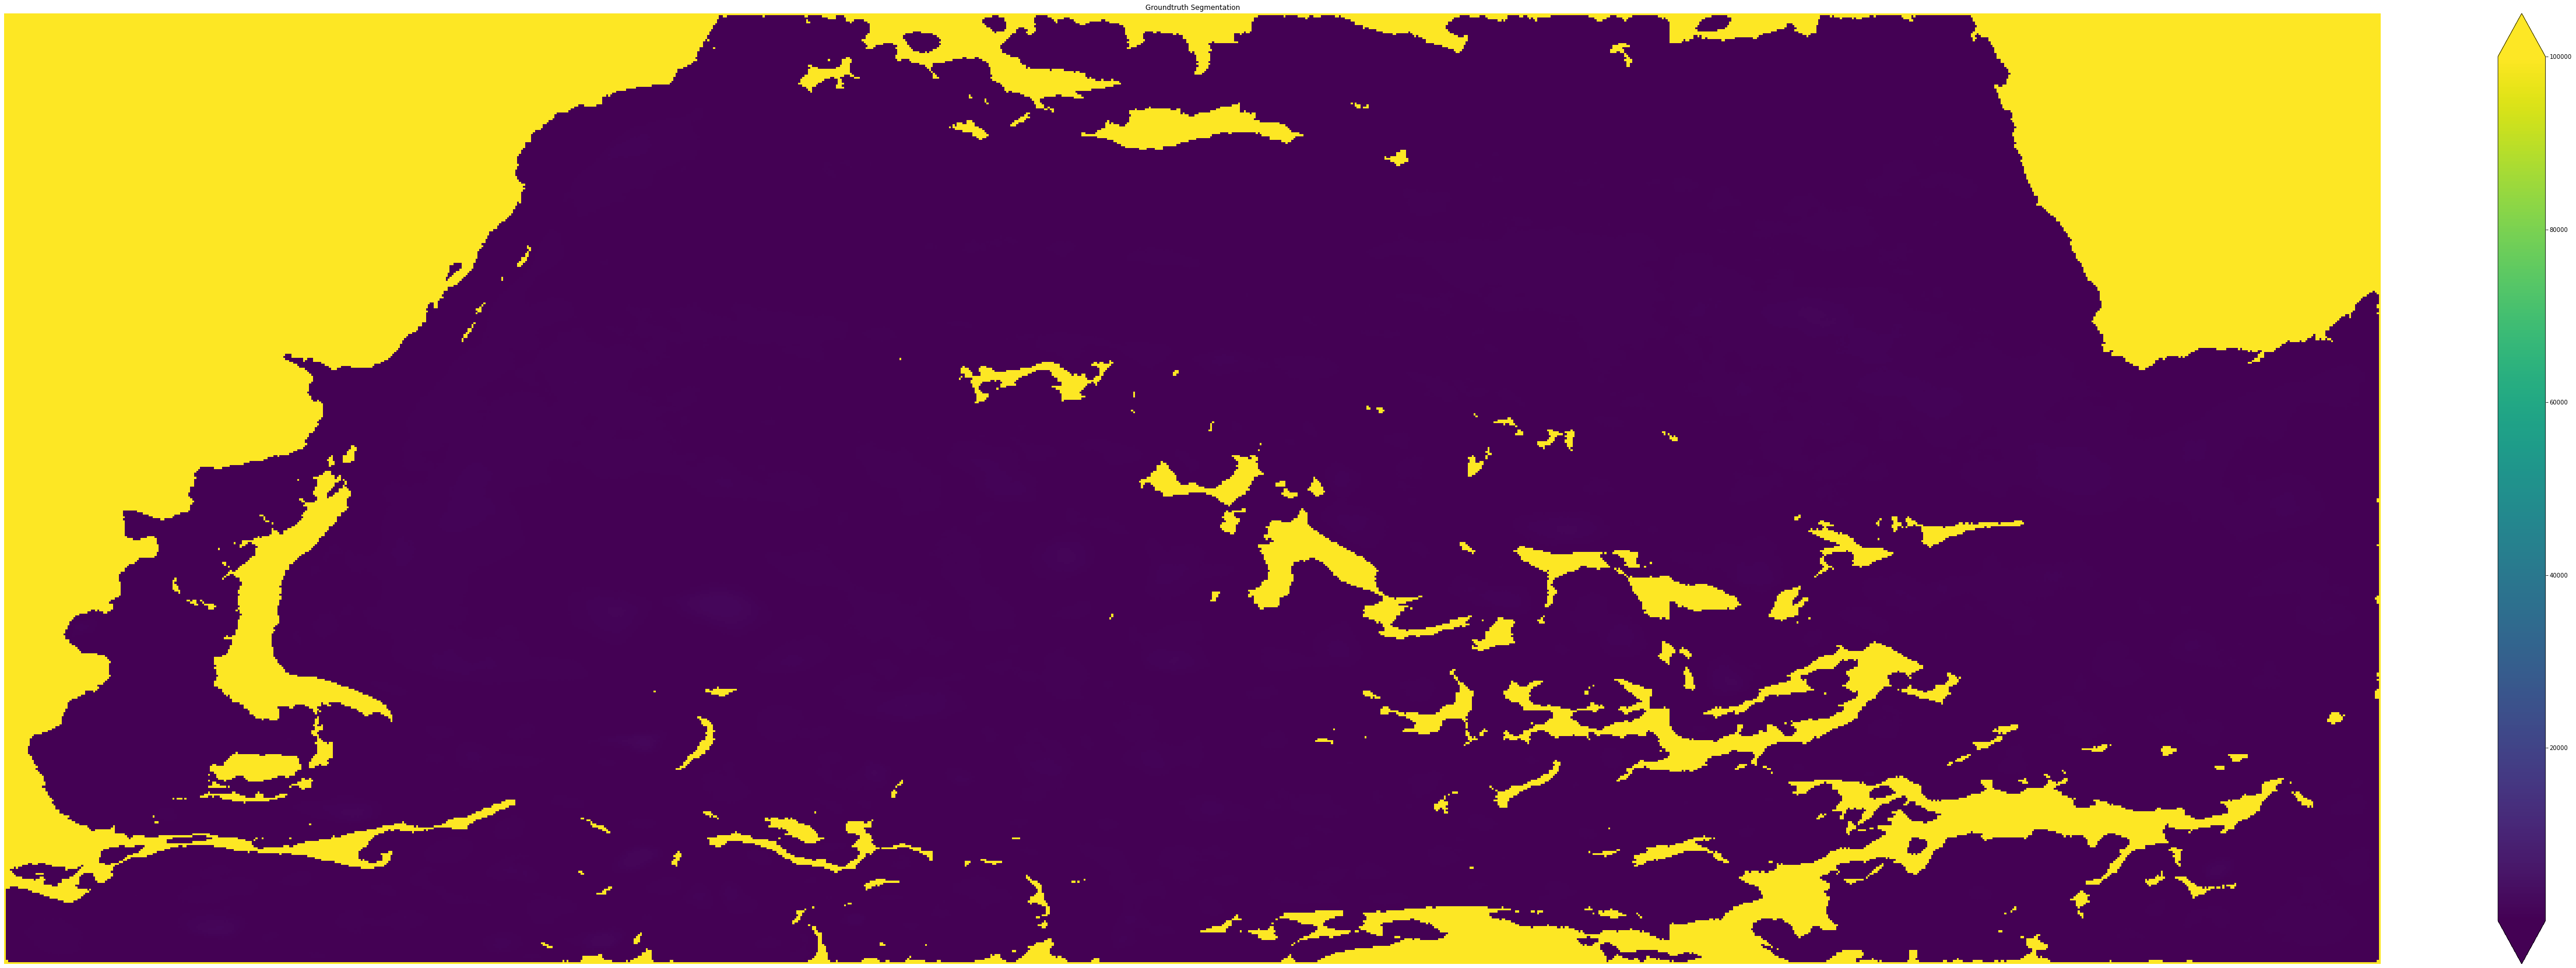

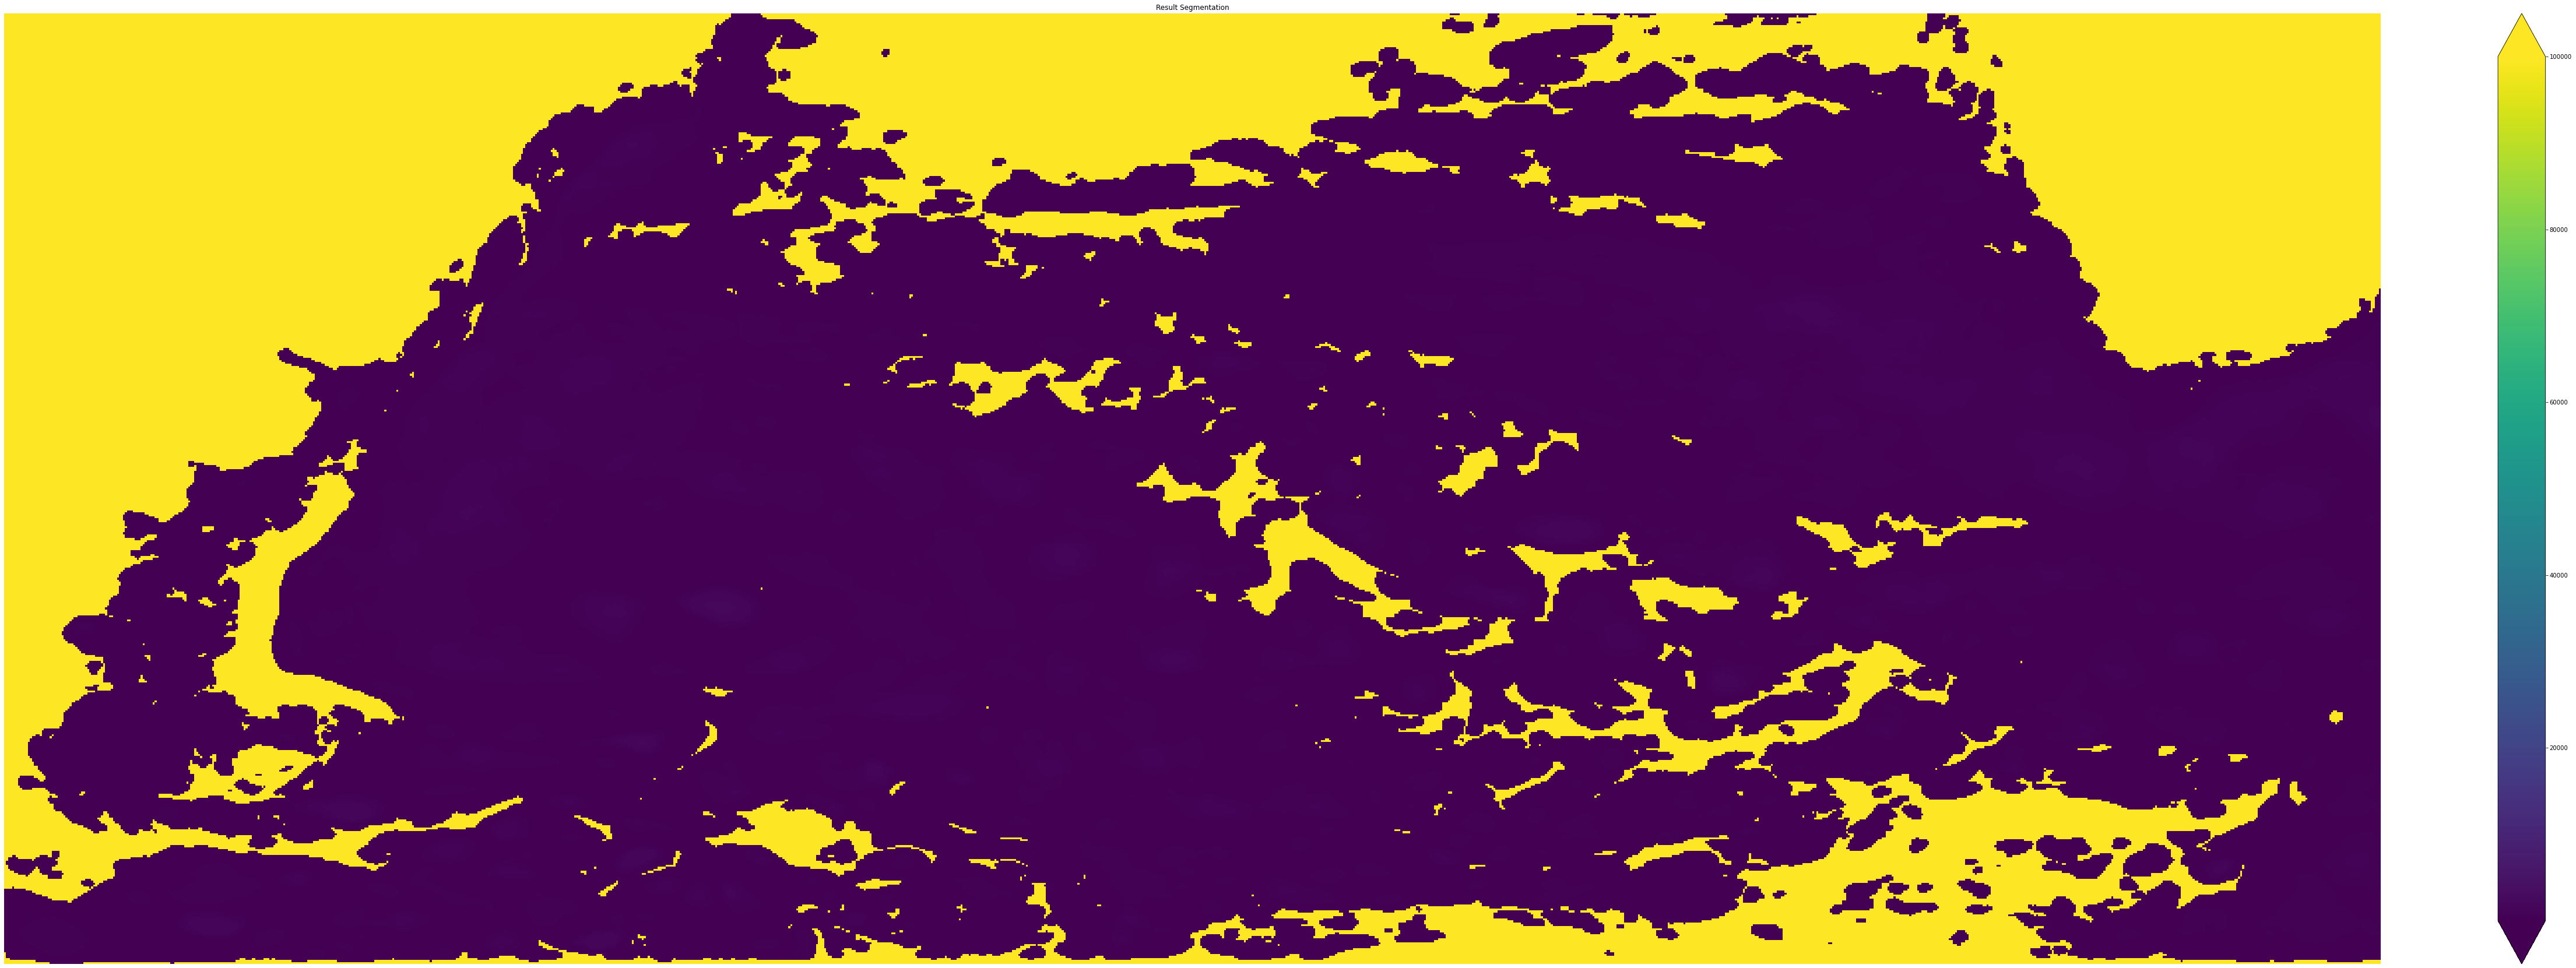

In [35]:
plt.figure(figsize=(90, 30))

#plt.subplot(131)
plt.imshow(np.flipud(sum_true.T), cmap='viridis')
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.axis('off')
plt.title('Groundtruth Segmentation');

plt.figure(figsize=(90, 30))
#plt.subplot(132)
plt.imshow(np.flipud(sum_pred.T), cmap='viridis')
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.axis('off')
plt.title('Result Segmentation');
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [9]:
test_y.shape

(1095, 1200, 480)

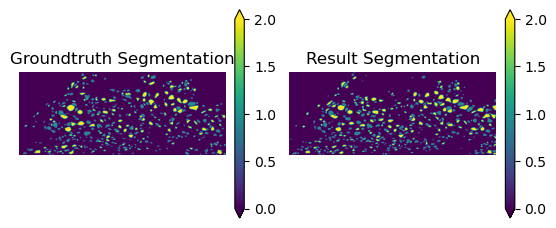

In [11]:
fig, ax = plt.subplots( 1, 2)
#plt.subplot(131)
im1 = ax[0].imshow(np.flipud(test_y[0, :,:].T), cmap='viridis')
plt.colorbar(im1, extend='both', fraction=0.042, pad=0.04, ax = ax[0])
ax[0].axis('off')
ax[0].set_title('Groundtruth Segmentation');

#plt.figure(figsize=(90, 30))
#plt.subplot(132)
im2 = ax[1].imshow(np.flipud(y1_pred[0, :,:].T), cmap='viridis')
plt.colorbar(im2, extend='both', fraction=0.042, pad=0.04, ax = ax[1])
ax[1].axis('off')
ax[1].set_title('Result Segmentation');
#tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

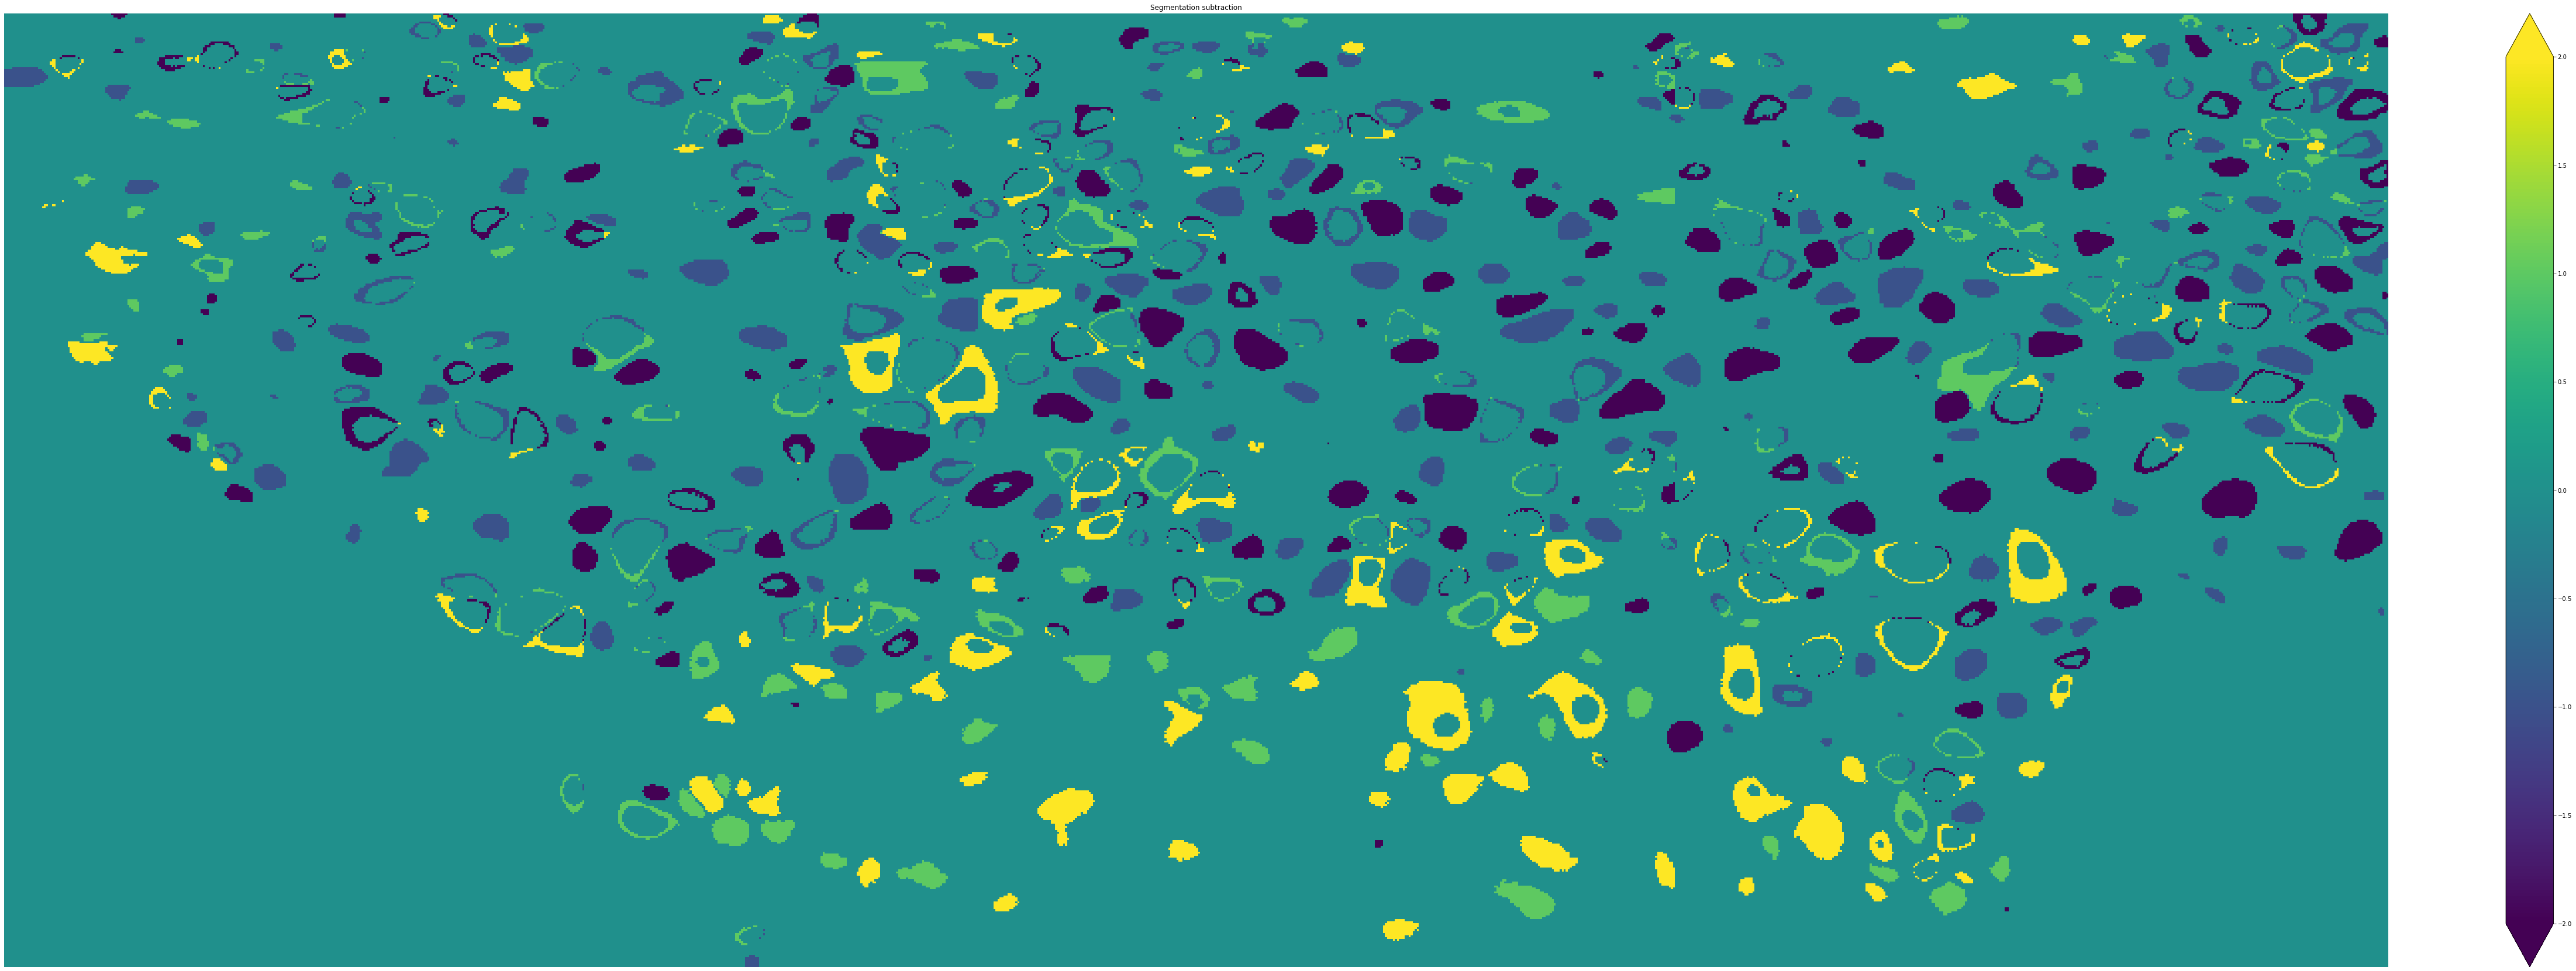

In [8]:
plt.figure(figsize=(90, 30))
plt.imshow(test_y[20].T-preds_y[20].T, cmap='viridis')
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.axis('off')
plt.title('Segmentation subtraction');

In [ ]:
#img_size = (480,192)
img_size = (360,360)
num_classes = 3
input_dir_X = "/work/ollie/bpanthi/NN_gulf"
#input_dir_X = "/work/ollie/bpanthi/test_NN"
weight_path = "/work/ollie/bpanthi/NN_weights"

preds_y = using_model(img_size, num_classes, input_dir_X, weight_path)
print(preds_y.shape)

In [ ]:
#input_dir = "/home/ollie/ssunar/segmentation_masks_test"
input_dir = "/home/ollie/ssunar/segmentation_masks_NN_gulf"
input_file_paths = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
    ])
test_y = xr.open_dataset(input_file_paths[0])
test_y = test_y.seg_mask.to_numpy()
test_y = np.float32(test_y)
print(test_y.shape)

In [ ]:
data_y = test_y
unique, counts = np.unique(data_y, return_counts=True)
print(dict(zip(unique, counts)))

freq = [np.sum(counts)/j for j in counts]
weightsSeg = [f/np.sum(freq) for f in freq]
print(weightsSeg)
weight_med = weightsSeg

In [ ]:
plt.figure(figsize=(90, 30))
plt.imshow(test_y[30].T, cmap='viridis')
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.axis('off')
plt.title('Ground Truth Segmentation');

In [ ]:
fig = plt.figure(figsize=(90, 30))
plt.imshow(preds_y[30].T, cmap='viridis')
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.axis('off')
plt.title('Result Segmentation');


In [ ]:
plt.figure(figsize=(90, 30))
plt.imshow(test_y[30].T-preds_y[30].T, cmap='viridis')
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.axis('off')
plt.title('Segmentation subtraction');